
# **Mathematics SVD** _Day 50_

##### Name: Muhammad Hassaan
##### Date: Feb 09, 2024
##### Email: muhammadhassaan7896@gmail.com

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
# Process the data
# Selecting features for SVD
features = [ 'pclass', 'sex', 'age', 'fare', 'survived']

# Pipeline for numerical features
numeric_feattures = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline for categorical features
categorical_features = ['pclass','sex']
categorical_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feattures),
        ('cat', categorical_transformers, categorical_features)])

# Applying preprocessing to the datasets
X = preprocessor.fit_transform(titanic_df[features])

In [5]:
titanic_df[features].head()

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [6]:
X

array([[-0.56573646, -0.50244517,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.78684529,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.48885426,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.1046374 , -0.17626324,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.04438104,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.20276197, -0.49237783,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

In [7]:
X.shape

(891, 7)

In [8]:
# perform SVD
svd = TruncatedSVD(n_components=4) # You can adjust n_components
Y = svd.fit_transform(X)

print("Singular Values:", svd.singular_values_)
print("Explained Variance Ratio:", svd.explained_variance_ratio_)

Singular Values: [34.0919237  29.83381513 28.43241553 18.6007055 ]
Explained Variance Ratio: [0.37544109 0.16349524 0.21253133 0.12019999]


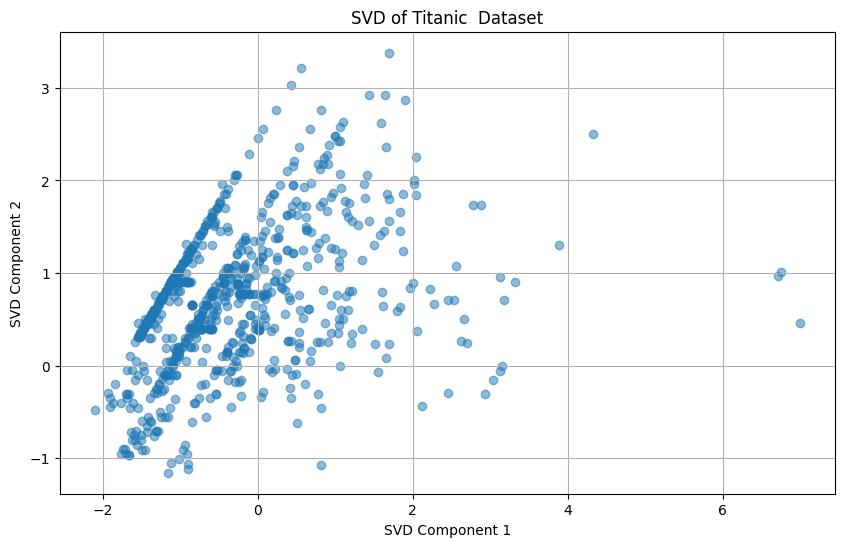

In [9]:
# visualizing
import matplotlib.pyplot as plt

# assuming Y in the results from SVD with 2 components
plt.figure(figsize= (10,6))
plt.scatter(Y[:,0], Y[:,1], alpha=0.5)
plt.title('SVD of Titanic  Dataset')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.grid(True)
plt.show()

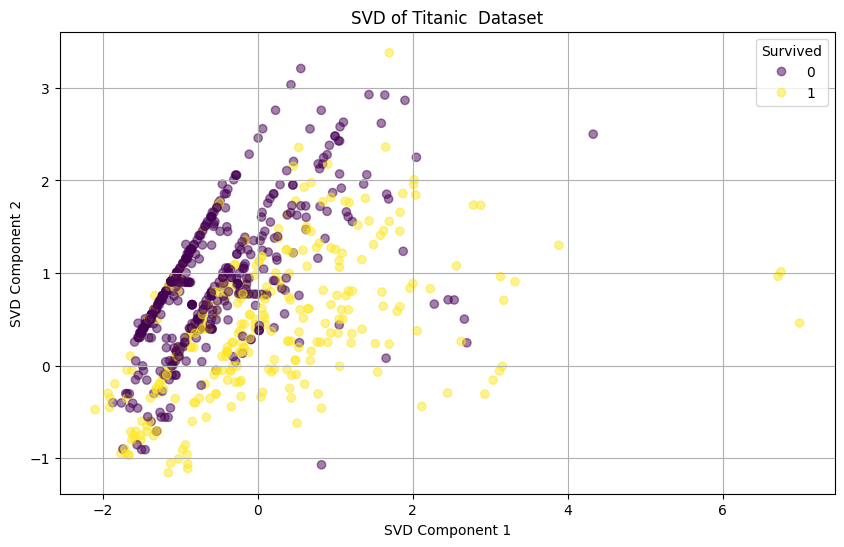

In [10]:
# assuming Survived in the last column in the features you selected
categories = titanic_df['survived'].values # Extract the survival status

plt.figure(figsize= (10,6))
scatter = plt.scatter(Y[:,0], Y[:,1], alpha=0.5, c = categories, cmap='viridis')
plt.title('SVD of Titanic  Dataset')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(*scatter.legend_elements(), title='Survived')
plt.grid(True)
plt.show()

---
# **Interpretition**
---